<h1>Predicting the Weather Tommorow</h1>

In this kernel, I implement Logistic Regression with Python and Scikit-Learn. I build a Logistic Regression classifier to predict whether or not it will rain tomorrow in Australia. I train a binary classification model using Logistic Regression.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\ERIA\Desktop\DATA CENTER\DATA SETS\weatherAUS.csv\weatherAUS.csv')

<h2>Exploratory Data Analysis</h2>

In [3]:
df.shape

(142193, 24)

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [5]:
col_names=df.columns
col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

Dropping RISK_MM column as it's not relevant

In [6]:
df.drop(columns='RISK_MM',inplace=True)
df.shape

(142193, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

<h3>Missing Values</h3>

In [8]:
df.isna().sum()
missing_count=df.isna().sum()
value_count=df.isna().count()
missing_pertge=round(missing_count/value_count * 100,1)
missing_df=pd.DataFrame({'count':missing_count,'percentage':missing_pertge}) #creating a df for missing data
print(missing_df)

               count  percentage
Date               0         0.0
Location           0         0.0
MinTemp          637         0.4
MaxTemp          322         0.2
Rainfall        1406         1.0
Evaporation    60843        42.8
Sunshine       67816        47.7
WindGustDir     9330         6.6
WindGustSpeed   9270         6.5
WindDir9am     10013         7.0
WindDir3pm      3778         2.7
WindSpeed9am    1348         0.9
WindSpeed3pm    2630         1.8
Humidity9am     1774         1.2
Humidity3pm     3610         2.5
Pressure9am    14014         9.9
Pressure3pm    13981         9.8
Cloud9am       53657        37.7
Cloud3pm       57094        40.2
Temp9am          904         0.6
Temp3pm         2726         1.9
RainToday       1406         1.0
RainTomorrow       0         0.0


There are four fields with 38% to 48% of missing data. I dropped these columns since most probably these values are missing not at random. For example, we are missing a large number of evaporation figures and this may be limited by the capacity of the measuring instruments. Consequently, days with more extreme evaporation measures may not be recorded in the first place. Therefore, the remaining numbers are already biased. To that end, retaining these fields may contaminate the input data.

In [9]:
#drop columns with many missing values
df.drop(columns=['Evaporation','Sunshine','Cloud3pm','Cloud9am'], inplace=True)

#drop rows with missing labels i.e Rain Tomorrow
df.dropna(subset=['RainTomorrow'])

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No


After performing column-wise deletions, I deleted rows that are missing labels, “RainTomorrow”, through dropna().To build a machine learning model, we need labels to train or test the model, hence rows with no labels don’t help much with either process

For the remaining columns, I imputed the categorical variables and numerical variables separately. The code below classified columns into a categorical list and a numerical list

In [10]:
num_list=[]
cat_list=[]

for column in df:
    if column != "RainTomorrow":
        if (df[column].dtype=='float64'):
            num_list.append(column)
        elif (df[column].dtype=='O'):
            cat_list.append(column)
print(num_list,'\n')
print(cat_list)

['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm'] 

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [11]:
df[num_list].shape

(142193, 12)

__Numerical Variables__: impute missing values with the mean of the values in each column

In [12]:
df.fillna(df.mean(),inplace=True)

In [13]:
df[num_list].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
dtype: int64

__Categorical Variables__: iterate through the cat_list and replace missing values with “Unknown”

In [14]:
df[cat_list].isna().sum()

Date               0
Location           0
WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday       1406
dtype: int64

In [15]:
#replacing missing cat_values with unknown
for i in (cat_list):
    if df[i].isnull().any():
        df[i].fillna('Unknown',inplace=True)

In [16]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

<h2>Feature Engineering and EDA</h2>

I automated the univariate analysis through a FOR loop. If a numerical variable is encountered, a histogram will be generated to visualize the distribution. On the other hand, a bar chart is created for the categorical variable.
The purpose of this stage is to select the best features to use in a model development

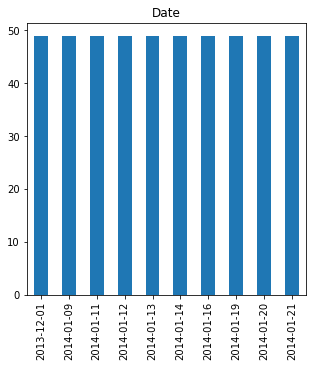

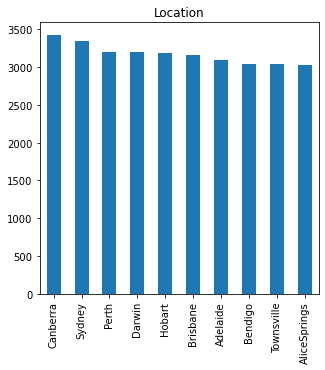

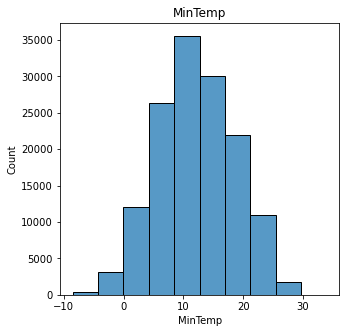

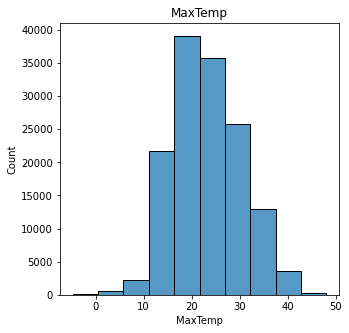

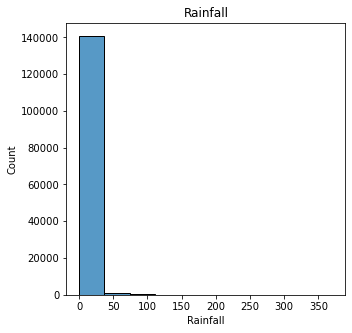

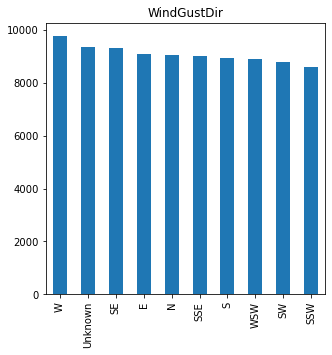

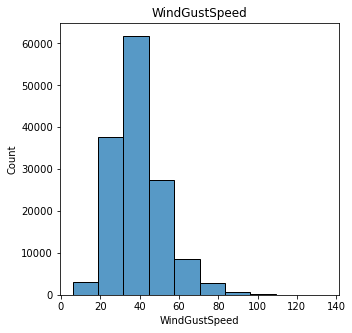

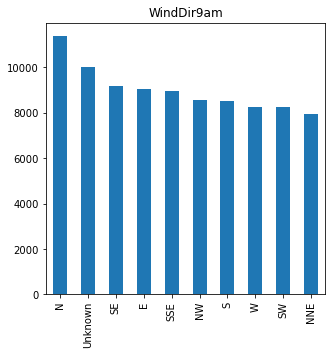

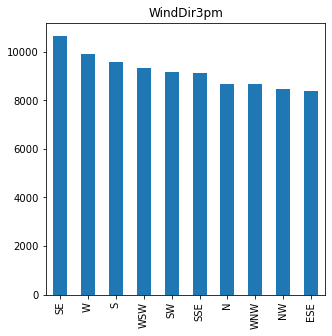

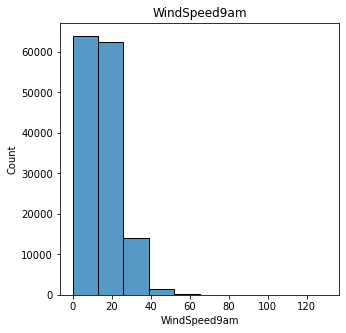

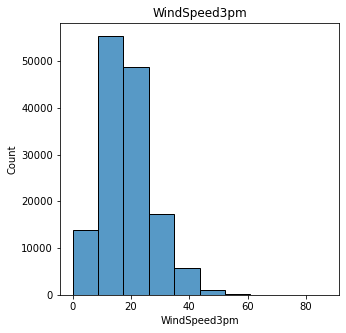

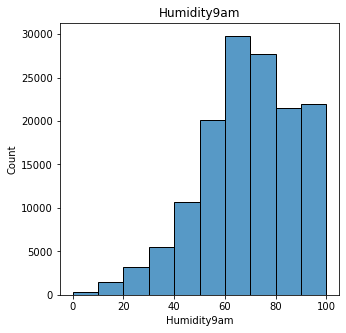

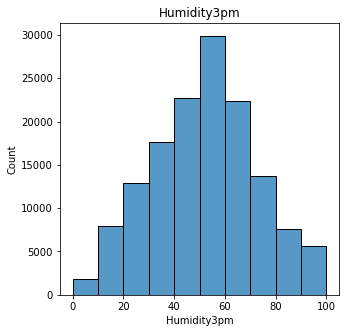

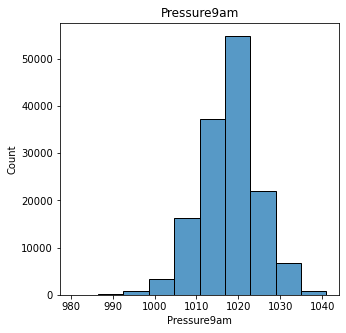

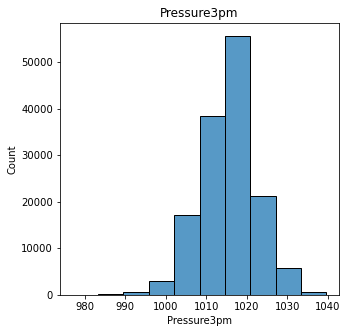

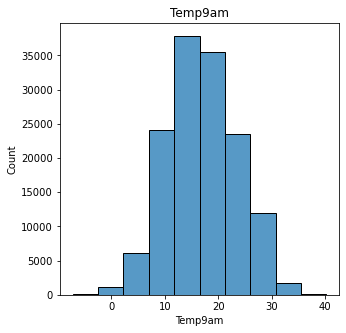

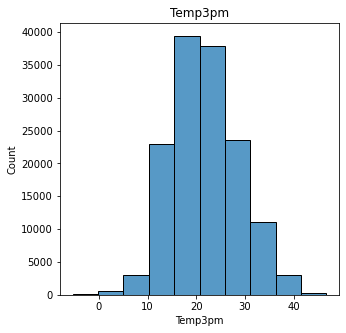

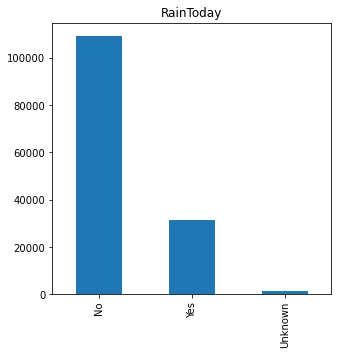

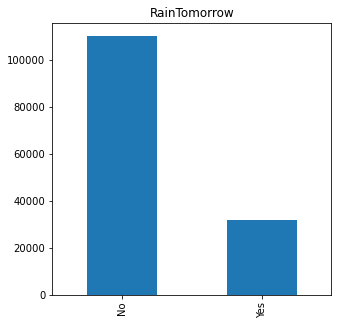

In [17]:
for column in df:
    plt.figure(column, figsize=(5,5))
    plt.title(column)
    if df[column].dtype=='float64':
       sns.histplot(x=df[column], bins=10)
    elif df[column].dtype=='O':
        #show only the top 10 value count in each categorical data
        df[column].value_counts()[:10].plot(kind='bar')

__1) Addressing Outliers__<br>
Now that we have a holistic view of the data distribution, it is much easier to spot outliers. For instance, Rainfall has a heavily right-skewed distribution, indicating that there is at least one significantly high record.

<AxesSubplot:xlabel='Rainfall', ylabel='Count'>

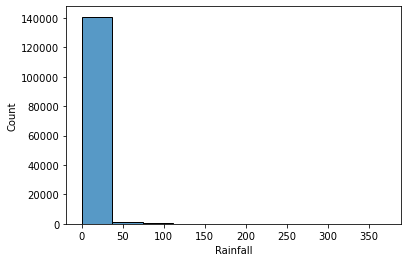

In [18]:
sns.histplot(df['Rainfall'], bins=10)

To eliminate the outliers, I used quantile(0.9) to limit the dataset to those fall into the 90% quantile of the dataset. As the result, the upper bound of Rainfall values significantly dropped from 350 to 6.

(127798, 19)

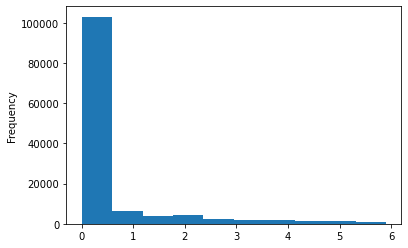

In [19]:
#address outliers in rainfall
maximum=df['Rainfall'].quantile(0.9)
df=df[df['Rainfall']<maximum]
df['Rainfall'].plot(kind='hist')
df.shape

__2) Feature Transformation__<br>
Date variable is transformed into Month. This is because Date has such high cardinality which makes it impossible to bring out patterns. Whereas using month may give suggestions whether it is more likely to rain in certain months of the year.



<AxesSubplot:>

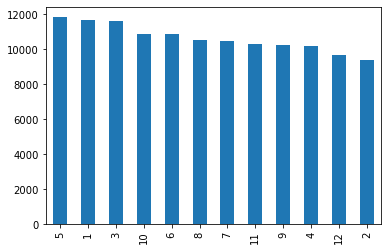

In [20]:
#date manipulation 
df['Month']=pd.to_datetime(df["Date"]).dt.month.apply(str)
df['Month'].value_counts().plot(kind='bar')

__3) Categorical Feature Encoding__<br>
Logistic regression only accepts numeric values as the input, therefore, it is necessary to encode the categorical data into numbers. The most common techniques are one-hot encoding and label encoding.<br>
I chose label encoding even though these columns are not ordinal. This is due to the fact that most fields have no less than 17 unique values and one-hot encoding will make the data size grow too wide.

__label encoding__

In [21]:
from sklearn.preprocessing import LabelEncoder
for i in cat_list:
    df[i]=LabelEncoder().fit_transform(df[i])

In [22]:
df['Location'].value_counts()

9     3117
15    2938
3     2916
48    2913
20    2887
37    2883
31    2866
0     2834
36    2811
7     2809
10    2808
19    2806
28    2792
5     2792
6     2786
35    2783
39    2758
2     2728
44    2722
42    2722
40    2722
32    2717
22    2711
17    2680
34    2679
30    2678
21    2655
4     2648
1     2640
38    2630
13    2618
33    2607
27    2603
12    2601
47    2595
14    2594
24    2571
46    2538
29    2534
26    2498
23    2498
8     2473
11    2467
43    2374
18    2226
45    2216
25    1497
41    1472
16    1385
Name: Location, dtype: int64

__converting all features to numeric format except the target__

In [23]:
df['Month']=df['Month'].astype('int64')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127798 entries, 0 to 142192
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           127798 non-null  int32  
 1   Location       127798 non-null  int32  
 2   MinTemp        127798 non-null  float64
 3   MaxTemp        127798 non-null  float64
 4   Rainfall       127798 non-null  float64
 5   WindGustDir    127798 non-null  int32  
 6   WindGustSpeed  127798 non-null  float64
 7   WindDir9am     127798 non-null  int32  
 8   WindDir3pm     127798 non-null  int32  
 9   WindSpeed9am   127798 non-null  float64
 10  WindSpeed3pm   127798 non-null  float64
 11  Humidity9am    127798 non-null  float64
 12  Humidity3pm    127798 non-null  float64
 13  Pressure9am    127798 non-null  float64
 14  Pressure3pm    127798 non-null  float64
 15  Temp9am        127798 non-null  float64
 16  Temp3pm        127798 non-null  float64
 17  RainToday      127798 non-nul

__4) Feature Selection__<br>
In this exercise, I use Correlation Analysis, which is a common multivariate EDA method that assists in identifying highly correlated variables

<AxesSubplot:>

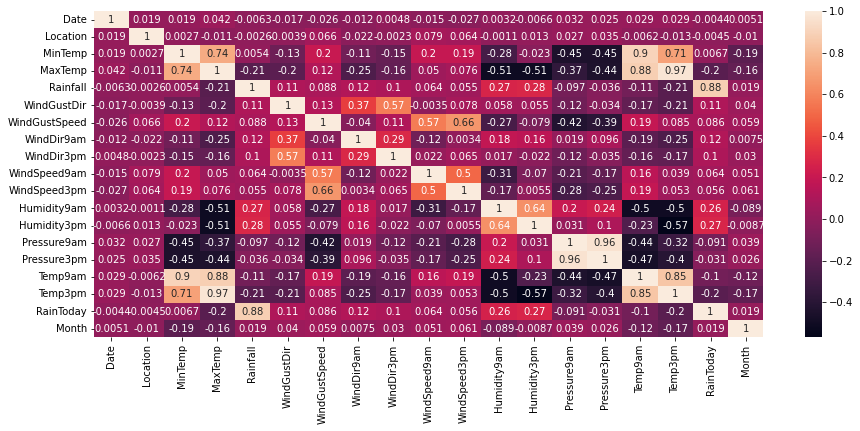

In [25]:
#correlation analysis
plt.figure(1, figsize=(15,6))
correlation =df.corr()
sns.heatmap(correlation, annot=True)

highly correllated features are:
1. mintemp, maxtemp,temp9am,temp3pm
2. rainfall and raintoday
3. pressure9am and pressure3pm
<br>
Since logistic regression requires there to be little multicollinearity among predictors, I try to keep only one variable in each group of highly correlated variables

In [26]:
#drop and rearrange columns
df=df[['Month','Location','MinTemp','WindGustDir', 'WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure3pm','RainToday','RainTomorrow']]

<h2>Model Building</h2><br>The objective of this project is to predict RainTomorrow. Therefore, the first task is to separate the input features (independent variables — X) and the label (dependent variable — y). df.iloc[:, :-1]is a handy function to grab all rows and all columns except the last one

In [27]:
X=df.drop(['RainTomorrow'],axis=1)
y=df['RainTomorrow']

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127798 entries, 0 to 142192
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Month          127798 non-null  int64  
 1   Location       127798 non-null  int32  
 2   MinTemp        127798 non-null  float64
 3   WindGustDir    127798 non-null  int32  
 4   WindGustSpeed  127798 non-null  float64
 5   WindDir9am     127798 non-null  int32  
 6   WindDir3pm     127798 non-null  int32  
 7   WindSpeed9am   127798 non-null  float64
 8   WindSpeed3pm   127798 non-null  float64
 9   Humidity9am    127798 non-null  float64
 10  Humidity3pm    127798 non-null  float64
 11  Pressure3pm    127798 non-null  float64
 12  RainToday      127798 non-null  int32  
dtypes: float64(7), int32(5), int64(1)
memory usage: 11.2 MB


__Engineering outliers in numerical variables__<br>

<AxesSubplot:xlabel='WindSpeed9am'>

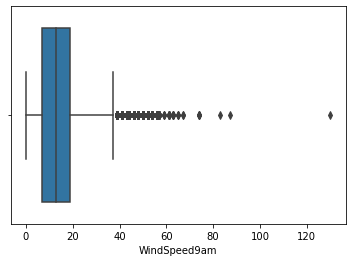

In [29]:
sns.boxplot(x=X['WindSpeed9am'])

<AxesSubplot:xlabel='WindSpeed3pm'>

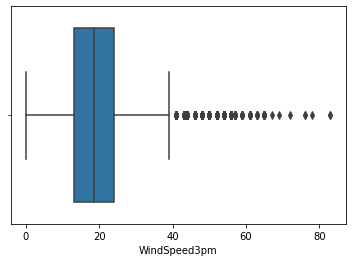

In [30]:
sns.boxplot(x=X['WindSpeed3pm'])

We have seen that the WindSpeed9am and WindSpeed3pm columns contain outliers. I will use top-coding approach to cap maximum values and remove outliers from the above variables.

In [31]:
X.shape

(127798, 13)

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127798 entries, 0 to 142192
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Month          127798 non-null  int64  
 1   Location       127798 non-null  int32  
 2   MinTemp        127798 non-null  float64
 3   WindGustDir    127798 non-null  int32  
 4   WindGustSpeed  127798 non-null  float64
 5   WindDir9am     127798 non-null  int32  
 6   WindDir3pm     127798 non-null  int32  
 7   WindSpeed9am   127798 non-null  float64
 8   WindSpeed3pm   127798 non-null  float64
 9   Humidity9am    127798 non-null  float64
 10  Humidity3pm    127798 non-null  float64
 11  Pressure3pm    127798 non-null  float64
 12  RainToday      127798 non-null  int32  
dtypes: float64(7), int32(5), int64(1)
memory usage: 11.2 MB


In [33]:
y.shape

(127798,)

<h2>Feature Scaling</h2>

I apply standardization to observations in a Gaussian distribution and normalization the non-gaussian. Below is how I check the distributions for each numerical variable 

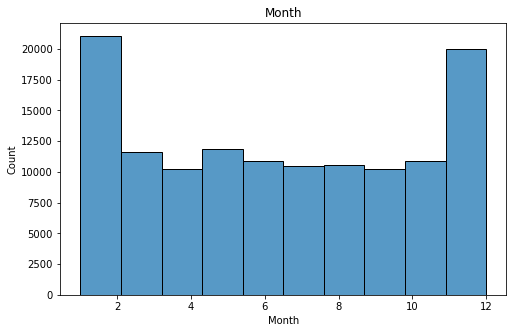

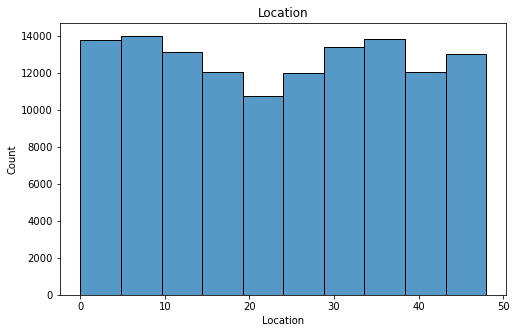

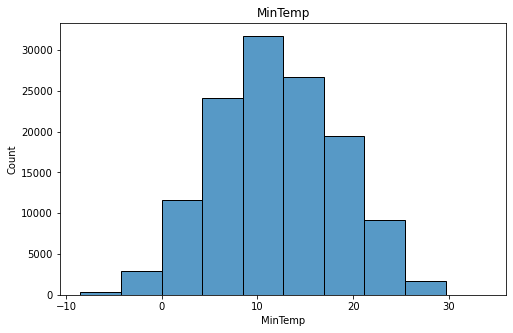

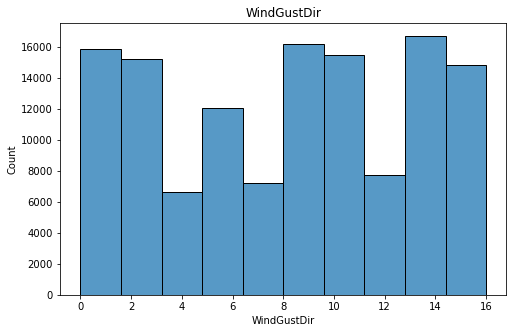

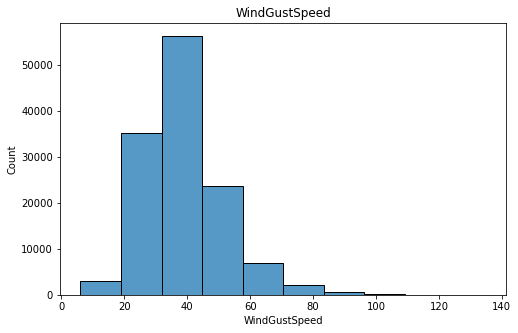

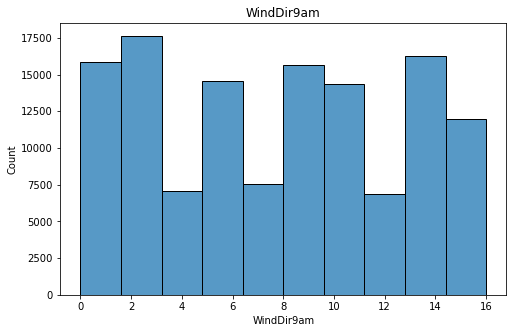

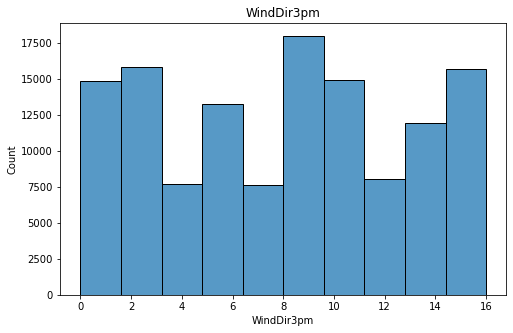

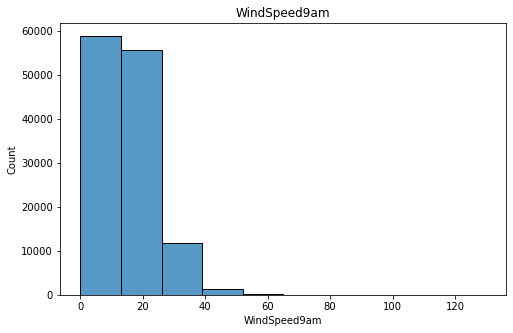

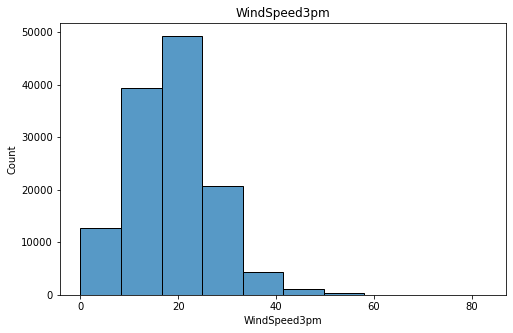

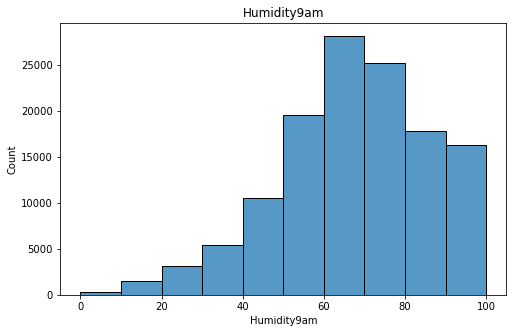

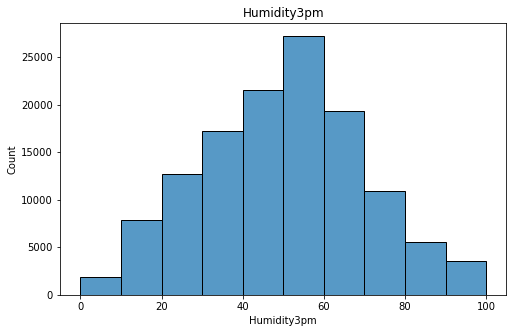

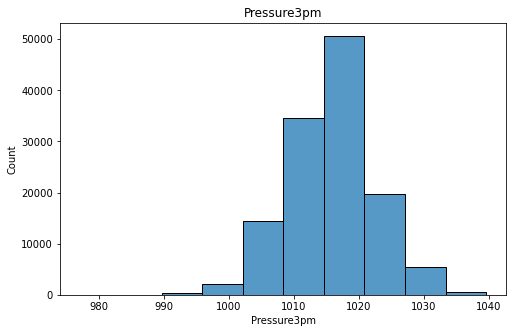

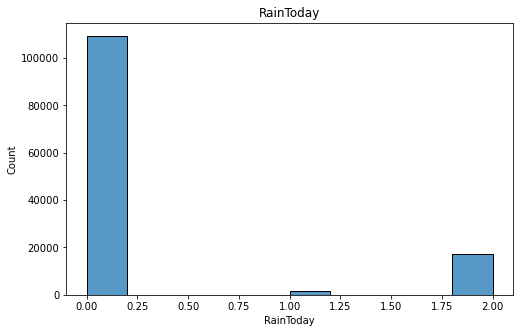

In [39]:
for column in X:
    plt.figure(column, figsize=(8,5))
    plt.title(column)
    if X[column].dtype=='float64':
       sns.histplot(x=X[column], bins=10)
    elif X[column].dtype=='int64':
        sns.histplot(x=X[column],bins=10)
    elif X[column].dtype=='int32':
        sns.histplot(x=X[column],bins=10) 

In [35]:
X['RainToday'].value_counts()
X.columns

Index(['Month', 'Location', 'MinTemp', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'RainToday'],
      dtype='object')

In [36]:
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
Standardize_Var = ['MinTemp', 'Humidity3pm']
Standardize_transformer = Pipeline(steps=[('standard', preprocessing.StandardScaler())])
Normalize_Var = ['Month','Location','WindGustDir','WindGustSpeed','WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
'Humidity9am', 'Pressure3pm', 'RainToday']
Normalize_transformer = Pipeline(steps=[('norm', preprocessing.MinMaxScaler())])

Secondly, both features and labels are broken down into a subset for training and another for testing. As the result, four portions are returned, X_train, X_test, y_train, and y_test. To achieve this, I introduce the train_test_split function and specify the parameter test_size. In the example below, test_size = 0.33, hence roughly 2/3 data used for training and 1/3 used for testing.

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)

preprocessor = ColumnTransformer(transformers= [('standard', Standardize_transformer, Standardize_Var),
 ('norm', Normalize_transformer, Normalize_Var)])

clf = Pipeline(steps=[('preprocessor', preprocessor),
 ('classifier', LogisticRegression(solver='lbfgs'))])

clf.fit(X_train, y_train)
print('Accuracy after standardizing Gaussian distributed features and normalizing Non-Gaussian features: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy after standardizing Gaussian distributed features and normalizing Non-Gaussian features: 0.85


<h3>k fold cross validation to further test accuracy</h3>

In [43]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression(), X, y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(round(accuracy,2))

[0.82738654 0.82957746 0.83873239 0.84186228 0.84591909 0.8471831
 0.84796557 0.85328638 0.85704225 0.86008295]
0.84


<h2>Predictions</h2>

In [44]:
Y=clf.predict(X_test)
z=pd.DataFrame(Y)
z.head()

,0
0,No
1,No
2,No
3,Yes
4,No


In [45]:
z.value_counts()

No     38137
Yes     4037
dtype: int64

<h2>Results and Conclusion</h2>

1.The logistic regression model accuracy score is 0.8501. So, the model does a very good job in predicting whether or not it will rain tomorrow in Australia.

2.Small number of observations predict that there will be rain tomorrow. Majority of observations predict that there will be no rain tomorrow.

3.The model shows no signs of overfitting.

4.Increasing the value of C results in higher test set accuracy and also a slightly increased training set accuracy. So, we can conclude that a more complex model should perform better.

5.Increasing the threshold level results in increased accuracy.

6.ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.

7.Our original model accuracy score is 0.8501 whereas accuracy score after RFECV is 0.8500. So, we can obtain approximately similar accuracy but with reduced set of features.

8.In the original model, we have FP = 1175 whereas FP1 = 1174. So, we get approximately same number of false positives. Also, FN = 3087 whereas FN1 = 3091. So, we get slighly higher false negatives.

9.Our, original model score is found to be 0.8476. The average cross-validation score is 0.8474. So, we can conclude that cross-validation does not result in performance improvement.

10.Our original model test accuracy is 0.8501 while GridSearch CV accuracy is 0.8507. We can see that GridSearch CV improve the performance for this particular model.